In [1]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Using TensorFlow backend.


In [41]:
def myfunc(t):
    A = np.random.rand(1)
    B = np.random.rand(1)
    C = np.random.rand(1)
    D = 100 + np.random.rand(1)
    E = np.random.rand(1)
    F = 0 # having trouble shifting graph -- get exact values and plot on Desmos
    return (A * np.exp(-(np.square((t-F)-B))/(np.square(C))) * np.sin(D*t + E))
    
def noisy(y):
    # noise = np.random.uniform(-0.5, 0.5, size=y.shape)
    noise = 0.5 * np.random.normal(0,1,8192)
    # try reducing noise range, and try np.random.normal
    return y + noise

t = np.linspace(-2, 3, 8192)

# Generate training data
clean_data = []
noisy_data = []
for i in range(4500):
    clean_data.append(t)
    clean_data[i] = myfunc(clean_data[i])
    noisy_data.append(t)
    noisy_data[i] = noisy(clean_data[i])

# Generate test data
clean_data_test = []
noisy_data_test = []
for i in range(500):
    clean_data_test.append(t)
    clean_data_test[i] = myfunc(clean_data_test[i])
    noisy_data_test.append(t)
    noisy_data_test[i] = noisy(clean_data_test[i])

# Convert Python Lists to NumPy Arrays
x_train = np.asarray(noisy_data)
y_train = np.asarray(clean_data)
x_test = np.asarray(noisy_data_test)
y_test = np.asarray(clean_data_test)

Example from Training Data:


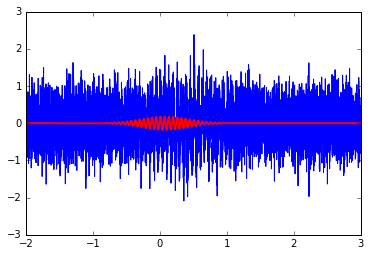

Example from Testing Data:


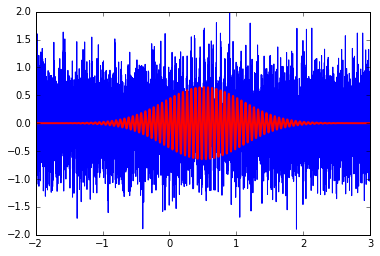

In [43]:
print("Example from Training Data:")
plt.cla()
plt.plot(t, noisy_data[int(np.random.uniform(0, 4500))], "b-")
plt.plot(t, clean_data[int(np.random.uniform(0, 4500))], "r-", linewidth=2.0)
plt.show()

print("Example from Testing Data:")
plt.cla()
plt.plot(t, noisy_data_test[int(np.random.uniform(0, 500))], "b-")
plt.plot(t, clean_data_test[int(np.random.uniform(0, 500))], "r-", linewidth=2.0)
plt.show()

In [44]:
def build_model():
    
    model = Sequential()

    model.add(Dense(8192, input_shape=(8192,)))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("relu"))
    
    model.add(Dense(8192))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
        
    return model

In [45]:
epochs = 200
global_start_time = time.time()

model = build_model()

model.fit(x_train,
          y_train,
          batch_size=64,
          nb_epoch=epochs,
          validation_split=0.1)

predicted = model.predict(x_test)

print((time.time() - global_start_time) / 60)

Train on 4050 samples, validate on 450 samples
Epoch 1/200
4050/4050 [==============================] - 7s 2ms/step - loss: 386.8874 - val_loss: 0.0060
Epoch 2/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 3/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0063 - val_loss: 0.0119
Epoch 4/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0165 - val_loss: 0.0126
Epoch 5/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0142 - val_loss: 0.0053
Epoch 6/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0051 - val_loss: 0.0049
Epoch 7/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0039 - val_loss: 0.0023
Epoch 8/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0026 - val_loss: 0.0026
Epoch 9/200
4050/4050 [==============================] - 6s 2ms/step - loss: 0.0021 - val_loss: 0.0030
Epoch 10/200
4050/4050 [

Epoch 77/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.4316e-04 - val_loss: 0.0026
Epoch 78/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.4483e-04 - val_loss: 0.0021
Epoch 79/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.4239e-04 - val_loss: 0.0021
Epoch 80/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.4205e-04 - val_loss: 0.0022
Epoch 81/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.4119e-04 - val_loss: 0.0025
Epoch 82/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.3519e-04 - val_loss: 0.0029
Epoch 83/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.3050e-04 - val_loss: 0.0023
Epoch 84/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.4013e-04 - val_loss: 0.0023
Epoch 85/200
4050/4050 [==============================] - 6s 2ms/step - loss: 1.3082e-04 - val_loss: 0.0025
Epoch 86/200
4050/4050 [====

4050/4050 [==============================] - 6s 2ms/step - loss: 9.0419e-05 - val_loss: 0.0030
Epoch 153/200
4050/4050 [==============================] - 6s 2ms/step - loss: 9.0162e-05 - val_loss: 0.0038
Epoch 154/200
4050/4050 [==============================] - 6s 2ms/step - loss: 8.7873e-05 - val_loss: 0.0029
Epoch 155/200
4050/4050 [==============================] - 6s 2ms/step - loss: 8.2413e-05 - val_loss: 0.0034
Epoch 156/200
4050/4050 [==============================] - 6s 2ms/step - loss: 8.6858e-05 - val_loss: 0.0031
Epoch 157/200
4050/4050 [==============================] - 6s 2ms/step - loss: 8.7735e-05 - val_loss: 0.0031
Epoch 158/200
4050/4050 [==============================] - 6s 2ms/step - loss: 8.7305e-05 - val_loss: 0.0030
Epoch 159/200
4050/4050 [==============================] - 6s 2ms/step - loss: 8.3047e-05 - val_loss: 0.0032
Epoch 160/200
4050/4050 [==============================] - 6s 2ms/step - loss: 8.7728e-05 - val_loss: 0.0034
Epoch 161/200
4050/4050 [========

In [46]:
t_two = np.linspace(-2, 3, 8192)
avg_mse = 0.0
for i in range(500):
    avg_mse += np.square(np.sum(y_test[i] - predicted[i]))
    
print("Average MSE: ", avg_mse / 500)

('Average MSE: ', 0.70484049717452668)


('MSE: ', 0.00010805097509826432)


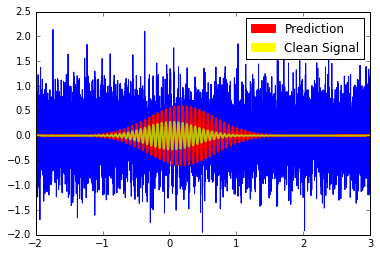

('MSE: ', 0.00032617661828820196)


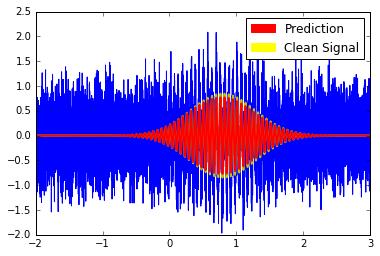

('MSE: ', 0.0074233416335836517)


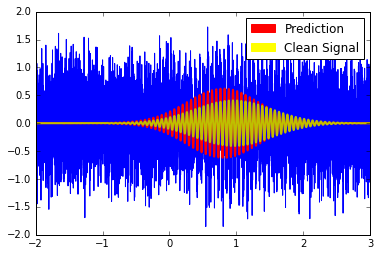

('MSE: ', 0.007417346647134988)


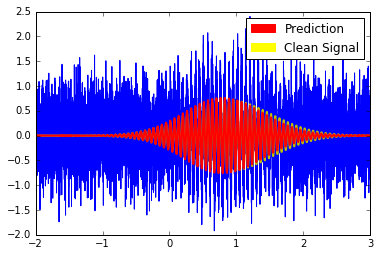

('MSE: ', 0.029610172394887953)


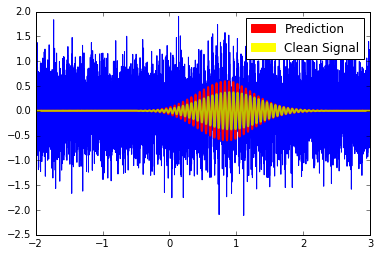

('MSE: ', 0.0037420526434111586)


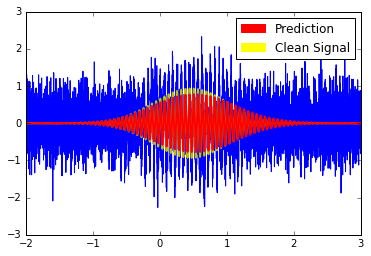

In [55]:
print("A Sample of the Results:")

n = 3
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 4
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 7
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 6
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 10
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()

n = 13
print("MSE: ", np.square(np.sum(y_test[n] - predicted[n])))
plt.plot(t_two, x_test[n], "b-", label='Noisy Signal')
plt.plot(t_two, y_test[n], "y-", label='True Data', linewidth=2.0)
plt.plot(t_two, predicted[n], "r-", label='Prediction', linewidth=2.0)
red_patch = mpatches.Patch(color='red', label='Prediction')
yellow_patch = mpatches.Patch(color='yellow', label='Clean Signal')
plt.legend(handles=[red_patch, yellow_patch])
plt.show()
